In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import warnings
import joblib
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report, accuracy_score

In [2]:
# Loading Multiple  CSV
csv1 = pd.read_csv("Data1.csv")
csv1['Person'] = '1'

csv2 = pd.read_csv("Data2.csv")
csv2['Person'] = '2'

csv3 = pd.read_csv("Data3.csv")
csv3['Person'] = '3'

# Combine into one DataFrame
combined_df = pd.concat([csv1, csv2, csv3], ignore_index=True)

# Write to a new CSV file
combined_df.to_csv("combined_data.csv", index=False)

# Preprocessing

In [3]:
#Load and Display Combined Data
data = pd.read_csv("combined_data.csv")
data.T.head(10)

,0,1,2,3,4,5,6,7,8,9,...,124324,124325,124326,124327,124328,124329,124330,124331,124332,124333
ID,-NtRbm_DcFo4HGfcZkay,-NtRbo1VIt2ERLbqS0Hf,-NtRboLy4M2_SDxFFX5L,-NtRbp-ib_C7bf5Y7enP,-NtRbpI-9VoKY9uMQRfq,-NtRbpcNu9jEculqeSW2,-NtRbpzQTip1l6bTCwSD,-NtRbqJcUDI7Yd1K94L_,-NtRbqqD8zf_KeMknrFf,-NtRbrBzW6z3l0_8q3lx,...,-Nu8tiME6dl5ISK6NOCw,-Nu8tkF8EzSzR5alxTJQ,-Nu8tmCCDRaLDzCQL-yY,-Nu8to9IdMXkDs4FyKu7,-Nu8tq6Nn9EO7dHfOTdp,-Nu8ts3Um4Fj1NWOPzmX,-Nu8tu0TRXBdjyqRRtEJ,-Nu8tvyZX-3PEqBFZX_R,-Nu8txvcHcPneDSBxf3z,-Nu8tzshPyqr95_8nJZO
BPM,3.59,12.48,19.71,76.82,24.97,90.77,83.22,90.77,41.01,78.84,...,68.0,71.0,78.0,68.0,71.0,65.0,78.0,75.0,53.0,136.0
Date,"Thursday,-March-21-2024-00:08:37","Thursday,-March-21-2024-00:08:37","Thursday,-March-21-2024-00:08:45","Thursday,-March-21-2024-00:08:45","Thursday,-March-21-2024-00:08:45","Thursday,-March-21-2024-00:08:50","Thursday,-March-21-2024-00:08:50","Thursday,-March-21-2024-00:08:50","Thursday,-March-21-2024-00:08:55","Thursday,-March-21-2024-00:08:55",...,"Friday,-March-29-2024-19:09:45","Friday,-March-29-2024-19:09:54","Friday,-March-29-2024-19:10:02","Friday,-March-29-2024-19:10:10","Friday,-March-29-2024-19:10:18","Friday,-March-29-2024-19:10:26","Friday,-March-29-2024-19:10:34","Friday,-March-29-2024-19:10:42","Friday,-March-29-2024-19:10:50","Friday,-March-29-2024-19:10:58"
Person,1,1,1,1,1,1,1,1,1,1,...,3,3,3,3,3,3,3,3,3,3


In [4]:
# Drop the date column and keep only the time from the 'Date' column
combined_df['Time'] = pd.to_datetime(combined_df['Date']).dt.time
# Drop the 'ID' and 'Date' columns from the DataFrame
combined_df.drop(['ID', 'Date'], axis=1, inplace=True)
# Remove any rows with missing values
combined_df.dropna(inplace=True)
# Convert the time to seconds
combined_df['Time'] = combined_df['Time'].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second)
# Save the cleaned DataFrame to a new CSV file
combined_df.to_csv("cleaned_data.csv", index=False)

In [5]:
# Load the cleaned csv then display it
data = pd.read_csv("cleaned_data.csv")
data[['BPM']].head(100).T

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
BPM,3.59,12.48,19.71,76.82,24.97,90.77,83.22,90.77,41.01,78.84,...,142.52,22.19,27.24,55.45,46.08,45.35,99.83,18.38,30.26,29.37


In [6]:
# Set the ranges BPM >= 50 & <= 90.9 and remove the rest
bpm_ranges = [(50, 60, 'Asleep'), (61, 90.9, 'Awake')]
combined_df = combined_df[(combined_df['BPM'] >= 50) & (combined_df['BPM'] <= 90.9)]
# Categorize 'State' based on BPM range
combined_df['State'] = pd.cut(combined_df['BPM'], bins=[r[0] for r in bpm_ranges] + [bpm_ranges[-1][1]], right=False, labels=[r[2] for r in bpm_ranges])
# Save to a new CSV
combined_df.to_csv("sleep_data.csv", index=False)

In [57]:
# Handles instances where there's continuous Awake and encounters a single instance of Asleep (Vice Versa)
def consolidate_states(states):
    consolidated_states = []
    current_state = None
    consecutive_count = 0
    
    for state in states:
        if state == current_state:
            consecutive_count += 1
        else:
            if current_state is not None:
                if consecutive_count > 1:
                    consolidated_states.extend([current_state] * consecutive_count)
                else:
                    consolidated_states.append(current_state)
            
            current_state = state
            consecutive_count = 1
    
    if current_state is not None:
        if consecutive_count > 1:
            consolidated_states.extend([current_state] * consecutive_count)
        else:
            consolidated_states.append(current_state)
    
    # Update singular occurrences based on surrounding states
    for i in range(1, len(consolidated_states) - 1):
        if consolidated_states[i] == "Asleep" and consolidated_states[i-1] == consolidated_states[i+1] == "Awake":
            consolidated_states[i] = "Awake"
        elif consolidated_states[i] == "Awake" and consolidated_states[i-1] == consolidated_states[i+1] == "Asleep":
            consolidated_states[i] = "Asleep"
    
    return consolidated_states

In [58]:
# Load the Sleep Data CSV and Display
data = pd.read_csv("sleep_data.csv")
data[['BPM', 'State']].head(100).T

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
BPM,76.82,90.77,83.22,90.77,78.84,88.11,83.22,80.97,78.84,83.22,...,68.1,69.69,65.15,90.77,52.54,53.52,88.11,85.59,80.97,78.74
State,Awake,Awake,Awake,Awake,Awake,Awake,Awake,Awake,Awake,Awake,...,Awake,Awake,Awake,Awake,Asleep,Asleep,Awake,Awake,Awake,Awake


In [59]:
# Descriptive statistics of dataset
data.describe()

,BPM,Person,Time
count,91459.000000,91459.000000,91459.000000
mean,59.076990,2.017166,27929.021026
std,8.604493,0.397941,14579.430495
min,50.000000,1.000000,400.000000
25%,53.380000,2.000000,17285.000000
50%,56.390000,2.000000,25817.000000
75%,59.760000,2.000000,34168.000000
max,90.770000,3.000000,86270.000000


In [63]:
# Splitting the Data
X = data[['BPM']]
y = data['State']

In [64]:
# Consolidate states
consolidated_y = consolidate_states(y)

In [65]:
# Save consolidated states to a CSV file
consolidated_data = pd.DataFrame({'BPM': X['BPM'], 'States': consolidated_y})
consolidated_data.to_csv('modified_states.csv', index=False)

In [66]:
# Using Label Encoder for "State" Variable
le = LabelEncoder()
y = le.fit_transform(consolidated_y)

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((73167, 1), (73167,), (18292, 1), (18292,))

In [68]:
# Normalize the  data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Logistic Regression

In [69]:
# Train Logistic Model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
# Cross validation - Five Folds
lr_cv_accuracy = cross_val_score(lr_model, X_train, y_train, cv=5)
lr_cv_predictions = cross_val_predict(lr_model, X_train, y_train, cv=5)
# Confusion Matrix for Logistic Regression
lr_conf_matrix = confusion_matrix(y_train, lr_cv_predictions)

## Evaluation Metrics


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     59350
           1       0.92      0.86      0.89     13817

    accuracy                           0.96     73167
   macro avg       0.94      0.92      0.93     73167
weighted avg       0.96      0.96      0.96     73167


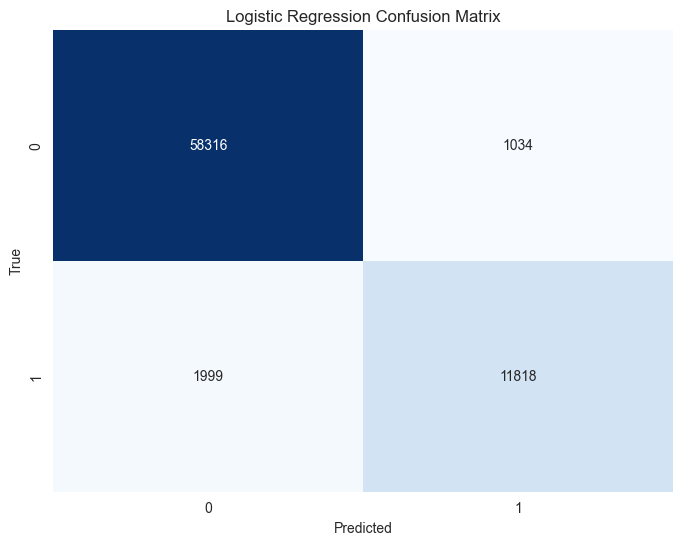


Cross-Validation Results for Logistic Regression:
Mean Accuracy: 95.85%
Standard Deviation: 0.12
Accuracy of the model on the test set: 95.65%


In [70]:
lr_precision = precision_score(y_train, lr_cv_predictions)
lr_recall = recall_score(y_train, lr_cv_predictions)
lr_f1 = f1_score(y_train, lr_cv_predictions)
print("\nClassification Report for Logistic Regression:")
print(classification_report(y_train, lr_cv_predictions))

plt.figure(figsize=(8, 6))
sns.heatmap(lr_conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Cross-validation results
print("\nCross-Validation Results for Logistic Regression:")
print(f"Mean Accuracy: {lr_cv_accuracy.mean()*100:.2f}%")
print(f"Standard Deviation: {lr_cv_accuracy.std()*100:.2f}")
print(f"Accuracy of the model on the test set: {lr_model.score(X_test, y_test)*100:.2f}%")

# Decision Tree Model

In [25]:
# Train the model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Cross-validation
dt_cv_accuracy = cross_val_score(dt_model, X_train, y_train, cv=5)
dt_cv_predictions = cross_val_predict(dt_model, X_train, y_train, cv=5)

# Confusion Matrix
dt_conf_matrix = confusion_matrix(y_train, dt_cv_predictions)

## Evaluation Metrics

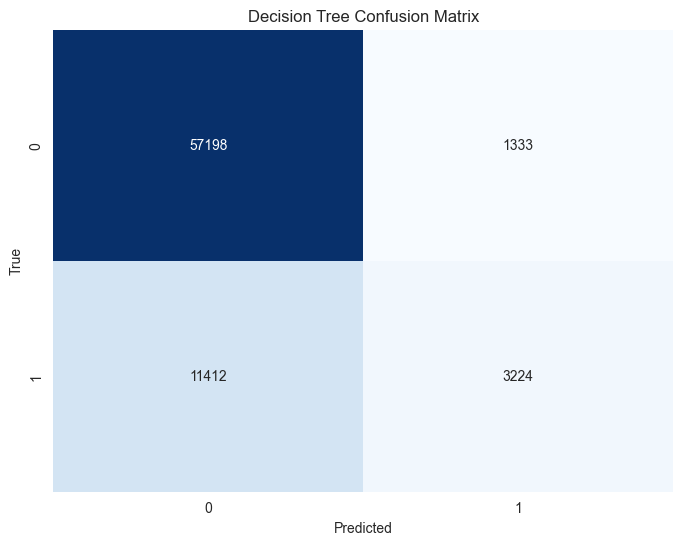


Cross-Validation Results for Decision Tree:
Mean Accuracy: 82.58%
Standard Deviation: 0.19
Accuracy of the model on the test set: 82.97%

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.83      0.98      0.90     58531
           1       0.71      0.22      0.34     14636

    accuracy                           0.83     73167
   macro avg       0.77      0.60      0.62     73167
weighted avg       0.81      0.83      0.79     73167


In [26]:
dt_precision = precision_score(y_train, dt_cv_predictions)
dt_recall = recall_score(y_train, dt_cv_predictions)
dt_f1 = f1_score(y_train, dt_cv_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(dt_conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Cross-validation results
print("\nCross-Validation Results for Decision Tree:")
print(f"Mean Accuracy: {dt_cv_accuracy.mean()*100:.2f}%")
print(f"Standard Deviation: {dt_cv_accuracy.std()*100:.2f}")
print(f"Accuracy of the model on the test set: {dt_model.score(X_test, y_test)*100:.2f}%")
print("\nClassification Report for Decision Tree:")
print(classification_report(y_train, dt_cv_predictions))

# Saving The Trained  LR Model

In [73]:
joblib.dump(lr_model, 'lr_model.pkl')

['lr_model.pkl']